In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


UserID CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
0    5618         Health          29.979719                     17   
1    4326           Arts          27.802640                      1   
2    5849           Arts          86.820485                     14   
3    4992        Science          35.038427                     17   
4    3866    Programming          92.490647                     16   

   NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  \
0                     3   50.365656       20.860773           1   
1                     5   62.615970       65.632415           1   
2                     2   78.458962       63.812007           1   
3                    10   59.198853       95.433162           0   
4                     0   98.428285       18.102478           0   

   CourseCompletion  
0                 0  
1                 0  
2                 1  
3                 1  
4                 0

In [ ]:
df = pd.read_csv("online_course_engagement_data.csv")
df.head()

In [4]:
df.tail()

UserID CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
8995    8757         Health          37.445225                     14   
8996     894        Science          48.631443                      7   
8997    6323         Health          38.212512                      3   
8998    3652         Health          70.048665                     13   
8999    5595         Health          93.589781                      7   

      NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  \
8995                     4   54.469359       32.990704           1   
8996                     7   59.413257        0.254625           0   
8997                     3   69.508297       70.188159           1   
8998                    10   79.655182       72.975225           1   
8999                     5   56.274546       11.299071           0   

      CourseCompletion  
8995                 0  
8996                 0  
8997                 0  
8998                 1  
8999                 0

In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 9000 non-null   int64  
 1   CourseCategory         9000 non-null   object 
 2   TimeSpentOnCourse      9000 non-null   float64
 3   NumberOfVideosWatched  9000 non-null   int64  
 4   NumberOfQuizzesTaken   9000 non-null   int64  
 5   QuizScores             9000 non-null   float64
 6   CompletionRate         9000 non-null   float64
 7   DeviceType             9000 non-null   int64  
 8   CourseCompletion       9000 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 632.9+ KB


UserID  TimeSpentOnCourse  NumberOfVideosWatched  \
count  9000.000000        9000.000000            9000.000000   
mean   4498.894556          50.163822              10.024667   
std    2596.849433          28.491750               6.029878   
min       1.000000           1.005230               0.000000   
25%    2251.750000          25.440548               5.000000   
50%    4483.500000          49.818417              10.000000   
75%    6751.250000          75.069924              15.000000   
max    9000.000000          99.992558              20.000000   

       NumberOfQuizzesTaken   QuizScores  CompletionRate   DeviceType  \
count           9000.000000  9000.000000     9000.000000  9000.000000   
mean               5.090556    74.706028       50.340146     0.500667   
std                3.157762    14.378383       28.950977     0.500027   
min                0.000000    50.005119        0.009327     0.000000   
25%                2.000000    62.283451       25.653614     0.000000   
50%                5.000000    74.743294       50.264124     1.000000   
75%                8.000000    87.022663       75.572493     1.000000   
max               10.000000    99.994984       99.979711     1.000000   

       CourseCompletion  
count       9000.000000  
mean           0.396444  
std            0.489186  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            1.000000  
max            1.000000

In [16]:
import seaborn as sn
import matplotlib.pyplot as plt

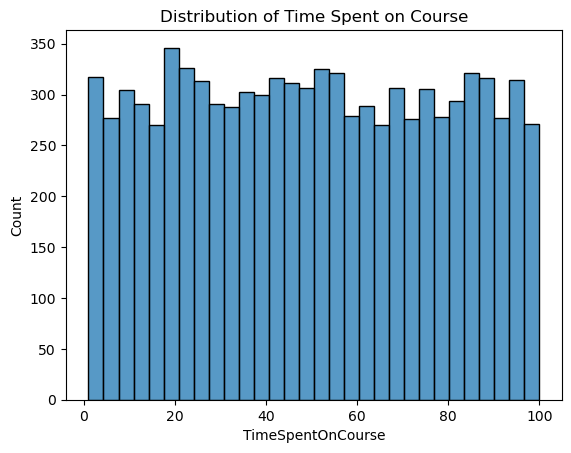

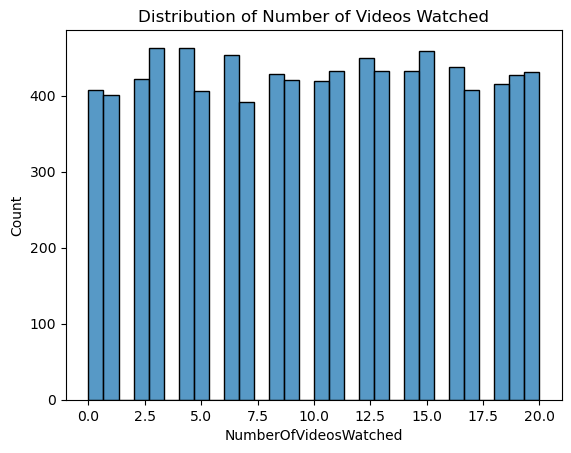

In [17]:
sns.histplot(df['TimeSpentOnCourse'], bins=30)
plt.title('Distribution of Time Spent on Course')
plt.show()

sns.histplot(df['NumberOfVideosWatched'], bins=30)
plt.title('Distribution of Number of Videos Watched')
plt.show()

In [86]:
sns.set(style="whitegrid")


In [87]:
plt.tight_layout()


<Figure size 640x480 with 0 Axes>

E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


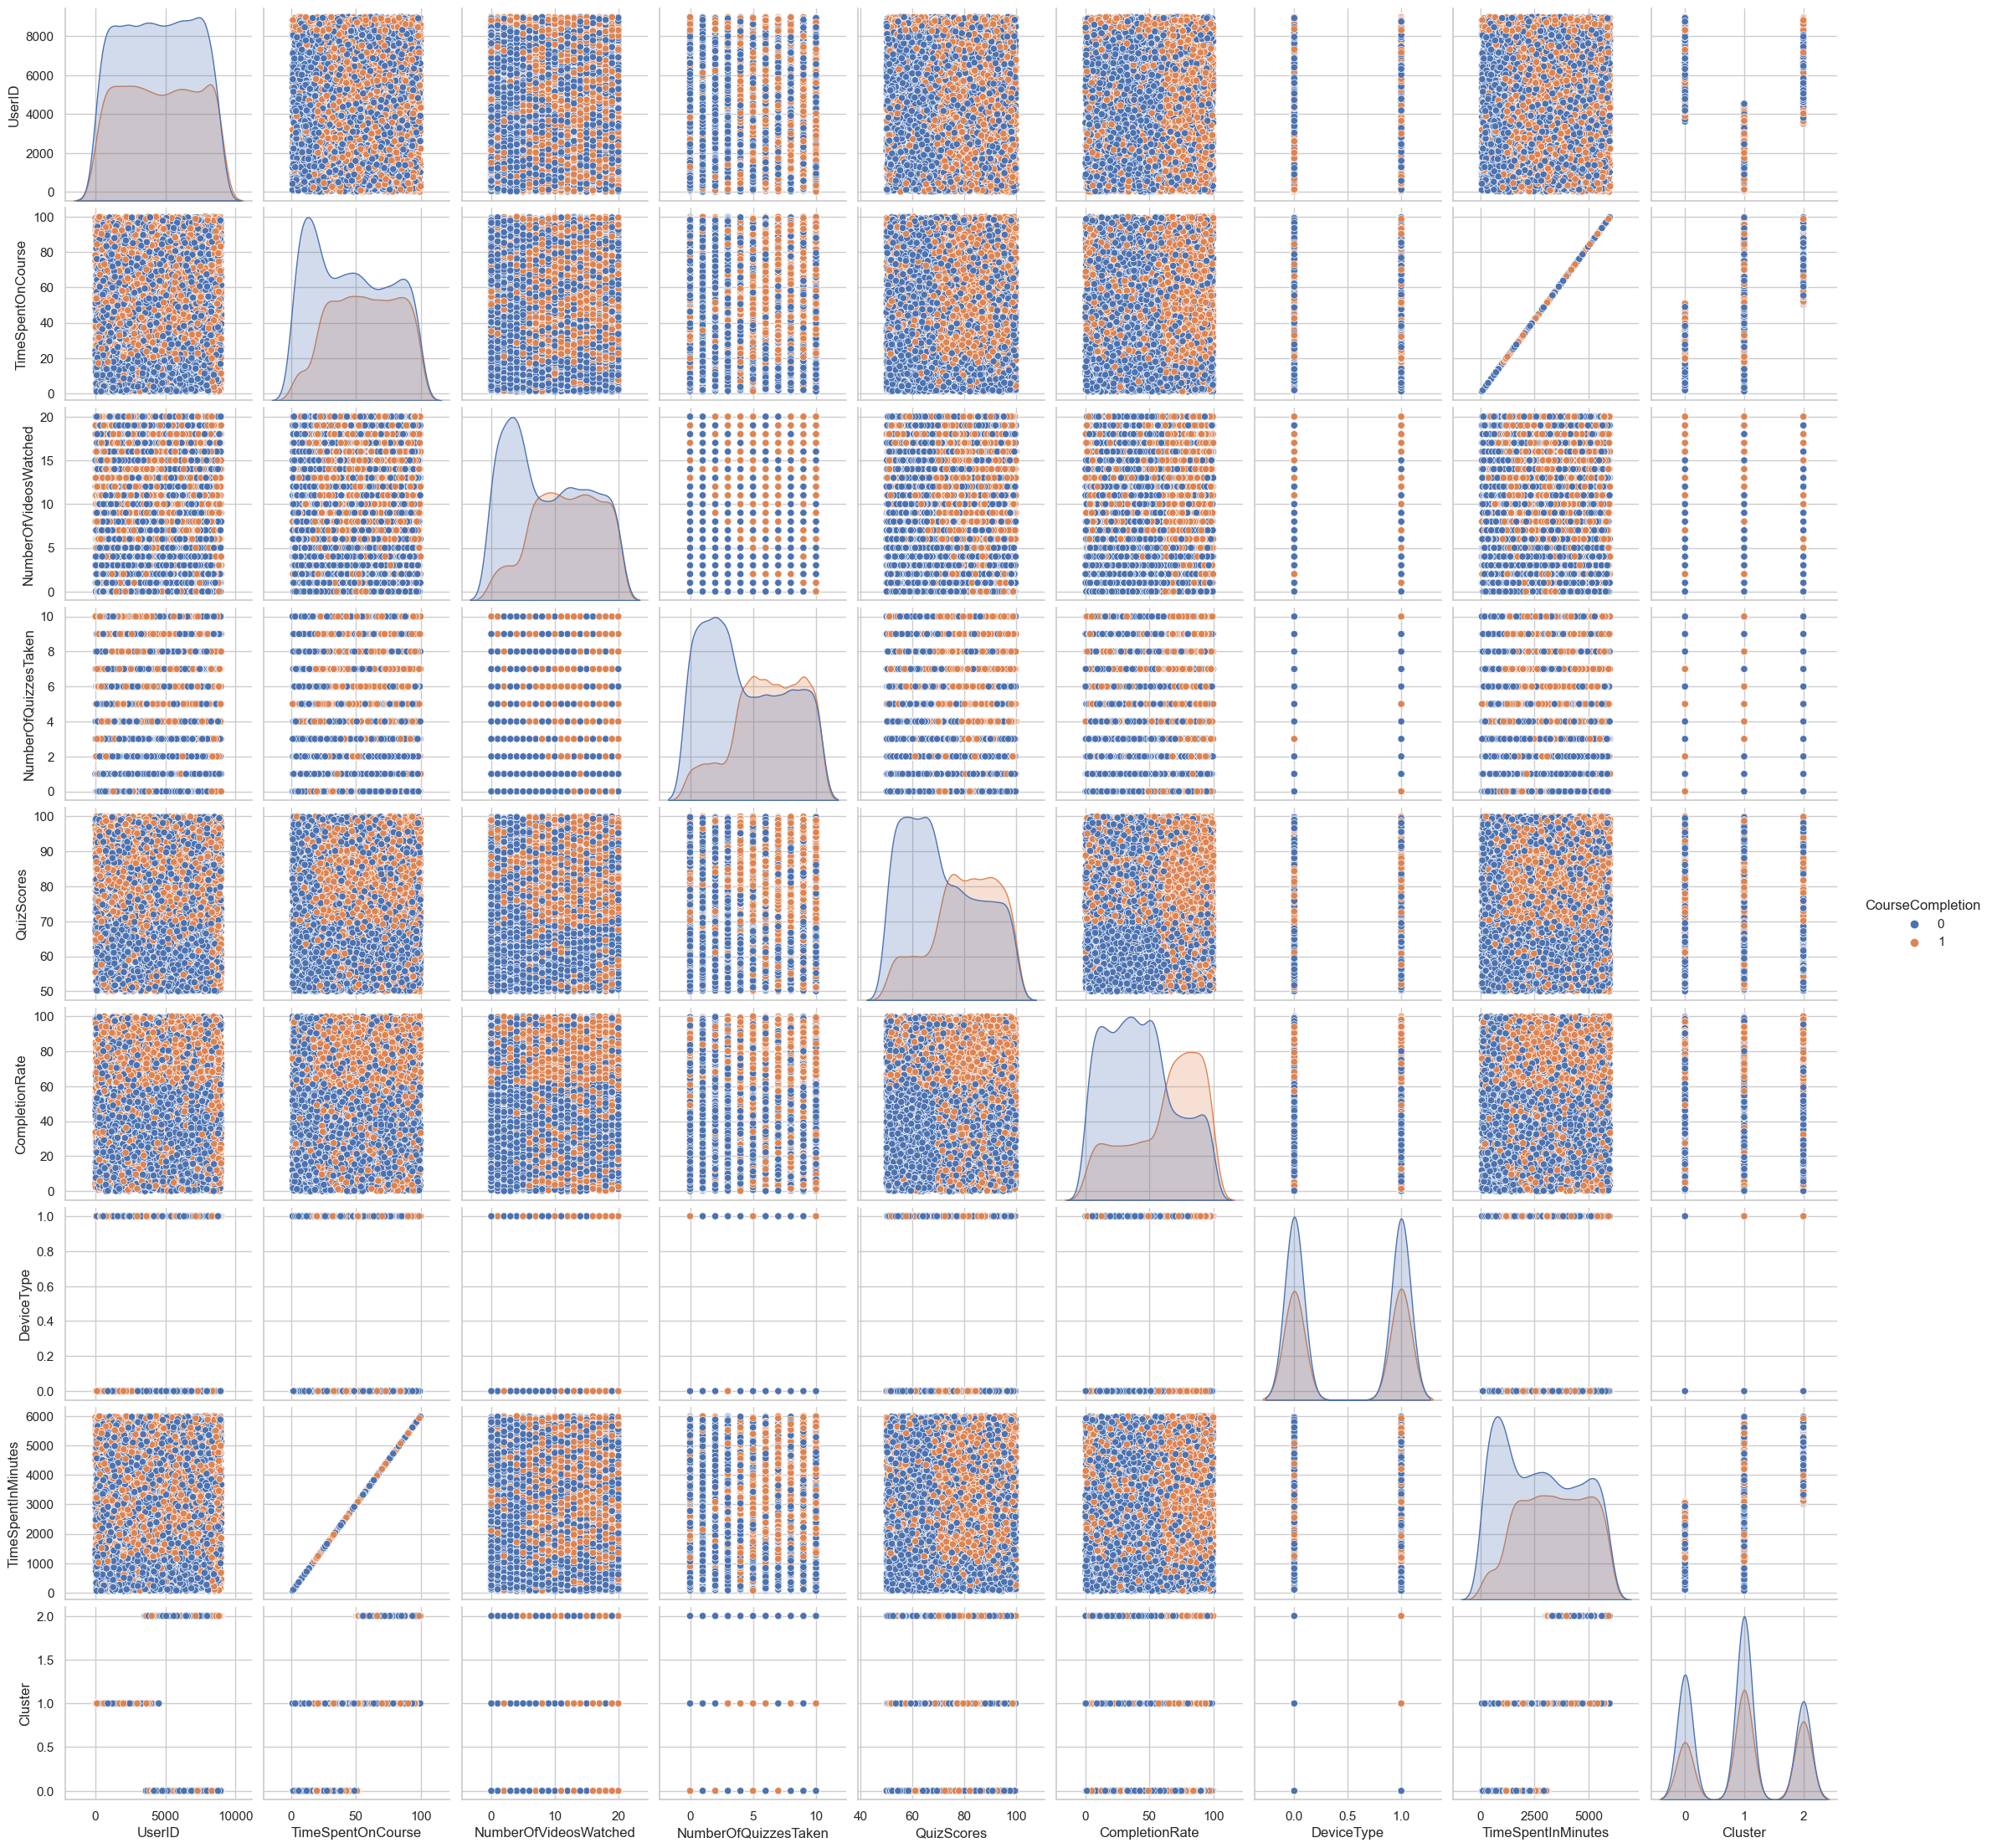

In [88]:
sns.pairplot(df, hue='CourseCompletion')
plt.show()


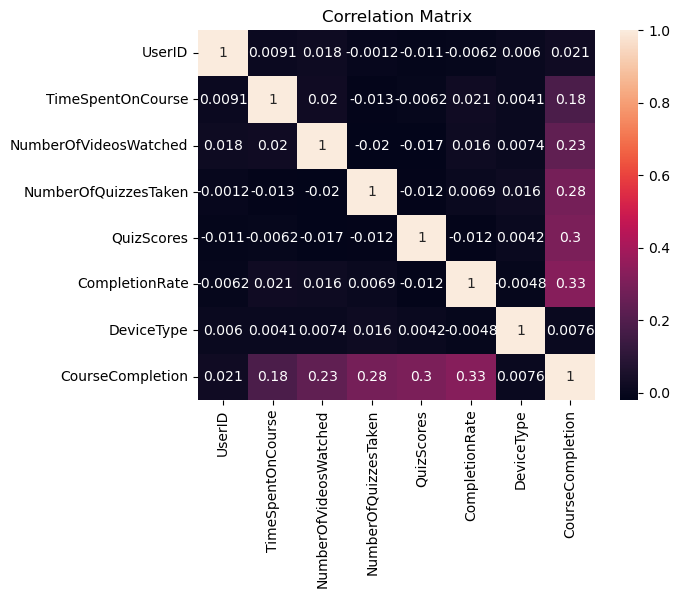

In [44]:
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


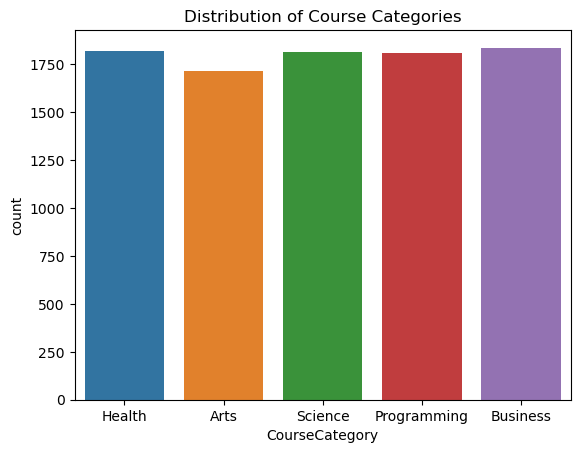

In [47]:
sns.countplot(data=df, x='CourseCategory')
plt.title('Distribution of Course Categories')
plt.show()


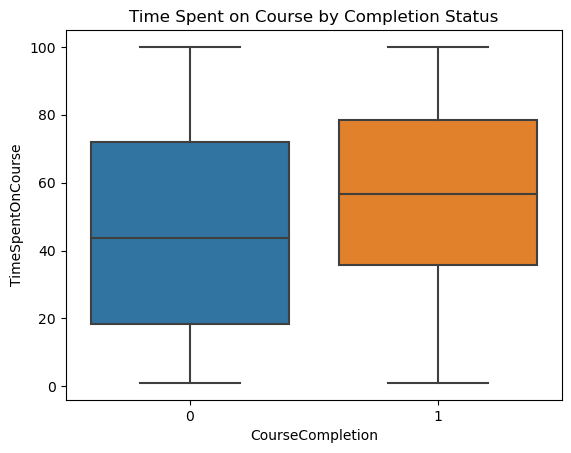

In [48]:
sns.boxplot(data=df, x='CourseCompletion', y='TimeSpentOnCourse')
plt.title('Time Spent on Course by Completion Status')
plt.show()


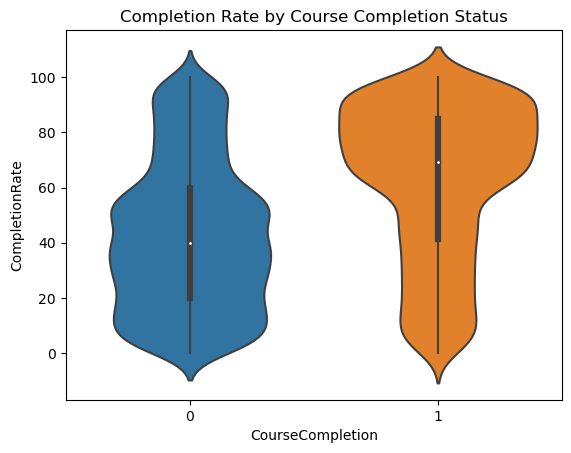

In [49]:
sns.violinplot(data=df, x='CourseCompletion', y='CompletionRate')
plt.title('Completion Rate by Course Completion Status')
plt.show()


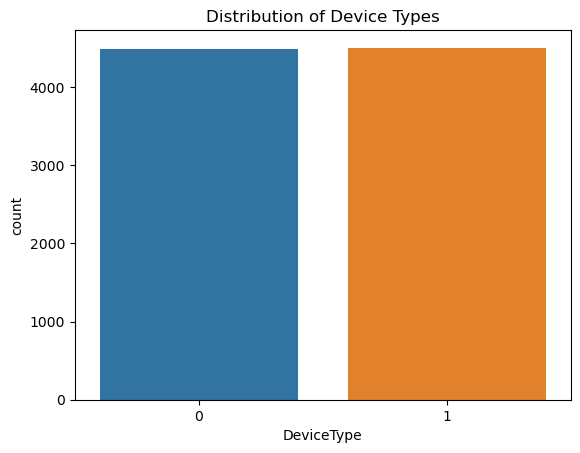

In [50]:
sns.countplot(data=df, x='DeviceType')
plt.title('Distribution of Device Types')
plt.show()


In [51]:
print(df['CourseCategory'].value_counts())
print(df['DeviceType'].value_counts())


CourseCategory
Business       1837
Health         1821
Science        1814
Programming    1810
Arts           1718
Name: count, dtype: int64
DeviceType
1    4506
0    4494
Name: count, dtype: int64


In [52]:
for column in df.columns:
    print(f'{column}: {df[column].nunique()} unique values')


UserID: 8123 unique values
CourseCategory: 5 unique values
TimeSpentOnCourse: 8123 unique values
NumberOfVideosWatched: 21 unique values
NumberOfQuizzesTaken: 11 unique values
QuizScores: 8123 unique values
CompletionRate: 8123 unique values
DeviceType: 2 unique values
CourseCompletion: 2 unique values


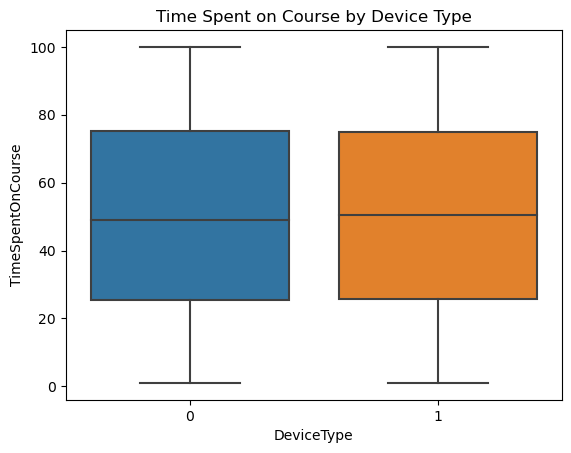

In [53]:
sns.boxplot(data=df, x='DeviceType', y='TimeSpentOnCourse')
plt.title('Time Spent on Course by Device Type')
plt.show()


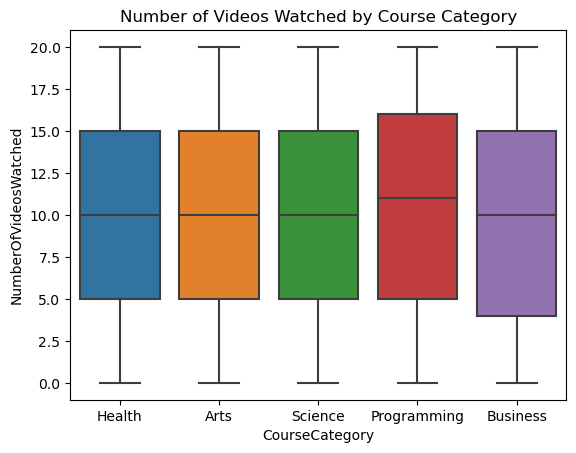

In [54]:
sns.boxplot(data=df, x='CourseCategory', y='NumberOfVideosWatched')
plt.title('Number of Videos Watched by Course Category')
plt.show()


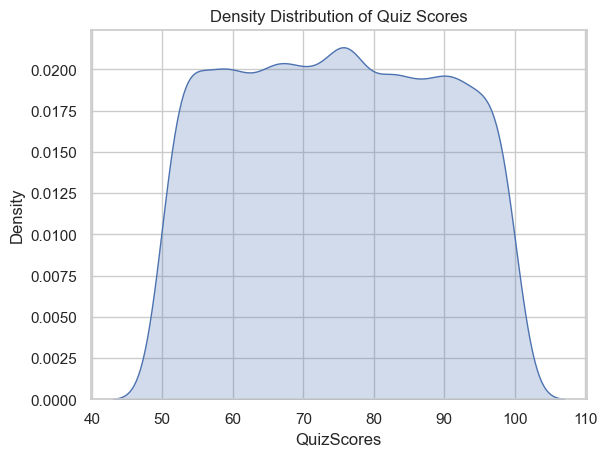

In [90]:
sns.kdeplot(df['QuizScores'], fill=True)
plt.title('Density Distribution of Quiz Scores')
plt.show()


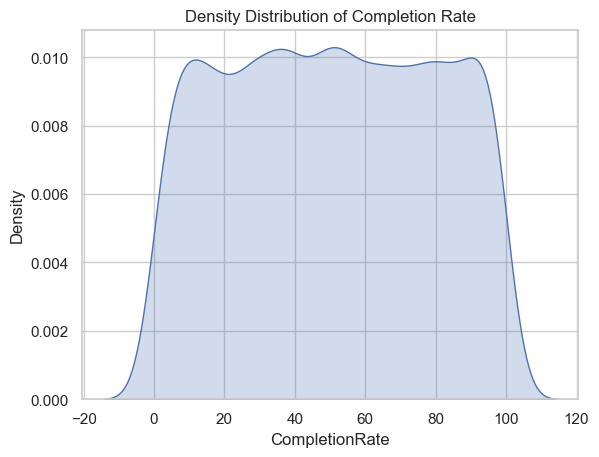

In [89]:
sns.kdeplot(df['CompletionRate'], fill=True)
plt.title('Density Distribution of Completion Rate')
plt.show()



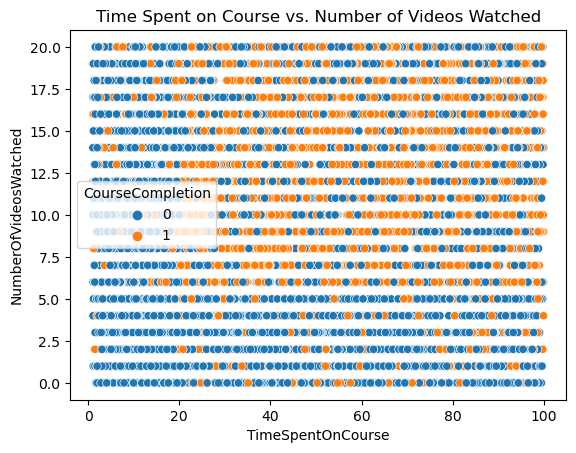

In [57]:
sns.scatterplot(data=df, x='TimeSpentOnCourse', y='NumberOfVideosWatched', hue='CourseCompletion')
plt.title('Time Spent on Course vs. Number of Videos Watched')
plt.show()


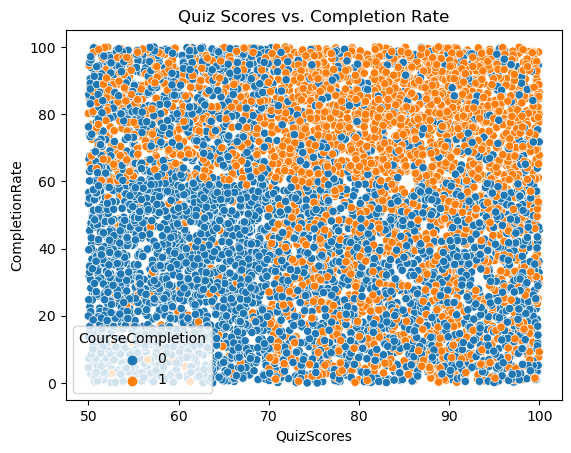

In [58]:
sns.scatterplot(data=df, x='QuizScores', y='CompletionRate', hue='CourseCompletion')
plt.title('Quiz Scores vs. Completion Rate')
plt.show()


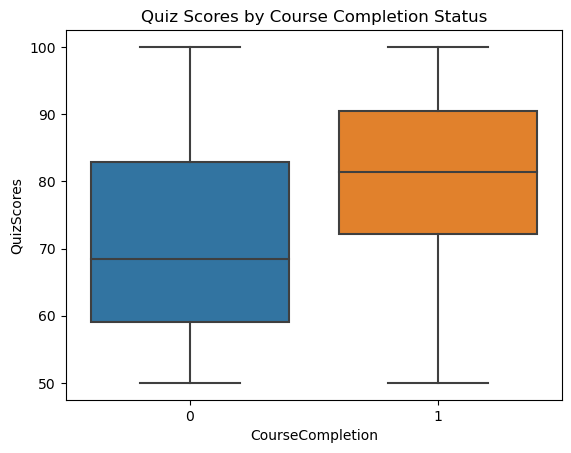

In [59]:
sns.boxplot(data=df, x='CourseCompletion', y='QuizScores')
plt.title('Quiz Scores by Course Completion Status')
plt.show()


In [62]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    print(f'{column}: Min = {df[column].min()}, Max = {df[column].max()}')


UserID: Min = 1, Max = 9000
TimeSpentOnCourse: Min = 1.005229866297383, Max = 99.99255785648448
NumberOfVideosWatched: Min = 0, Max = 20
NumberOfQuizzesTaken: Min = 0, Max = 10
QuizScores: Min = 50.00511862629234, Max = 99.99498421511456
CompletionRate: Min = 0.0093268021242876, Max = 99.97971128119624
DeviceType: Min = 0, Max = 1
CourseCompletion: Min = 0, Max = 1


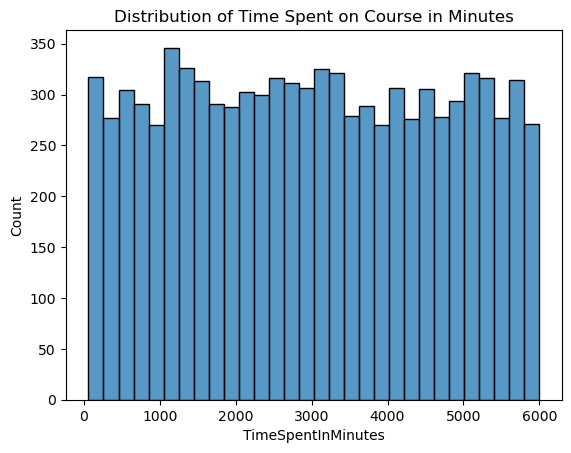

In [63]:

df['TimeSpentInMinutes'] = df['TimeSpentOnCourse'] * 60
sns.histplot(df['TimeSpentInMinutes'], bins=30)
plt.title('Distribution of Time Spent on Course in Minutes')
plt.show()


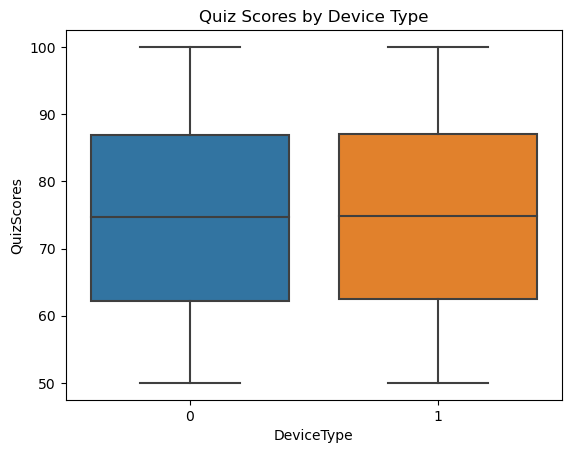

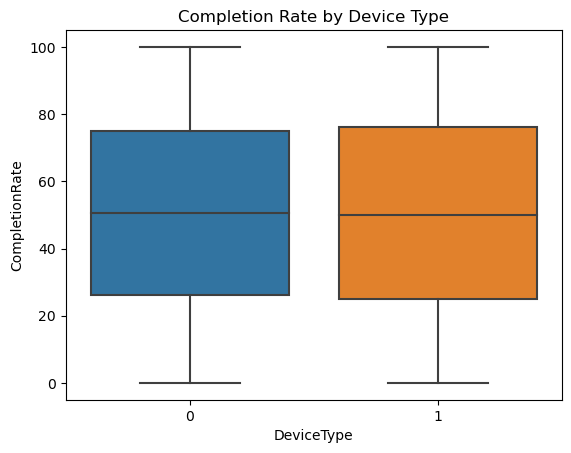

In [64]:
sns.boxplot(data=df, x='DeviceType', y='QuizScores')
plt.title('Quiz Scores by Device Type')
plt.show()

sns.boxplot(data=df, x='DeviceType', y='CompletionRate')
plt.title('Completion Rate by Device Type')
plt.show()


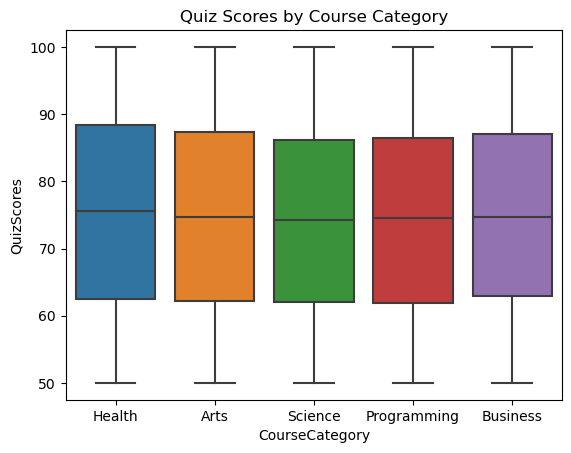

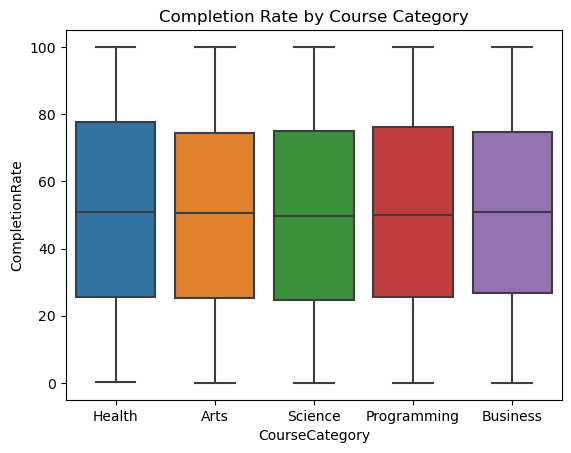

In [65]:
sns.boxplot(data=df, x='CourseCategory', y='QuizScores')
plt.title('Quiz Scores by Course Category')
plt.show()

sns.boxplot(data=df, x='CourseCategory', y='CompletionRate')
plt.title('Completion Rate by Course Category')
plt.show()


E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


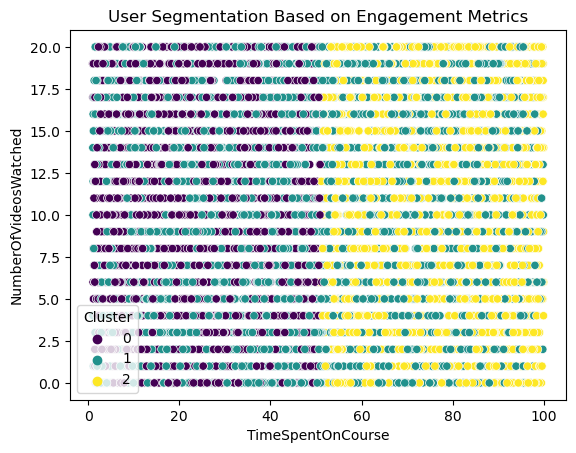

In [67]:
from sklearn.cluster import KMeans


df_numeric = df.select_dtypes(include=['float64', 'int64'])

kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df_numeric)
sns.scatterplot(data=df, x='TimeSpentOnCourse', y='NumberOfVideosWatched', hue='Cluster', palette='viridis')
plt.title('User Segmentation Based on Engagement Metrics')
plt.show()


E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


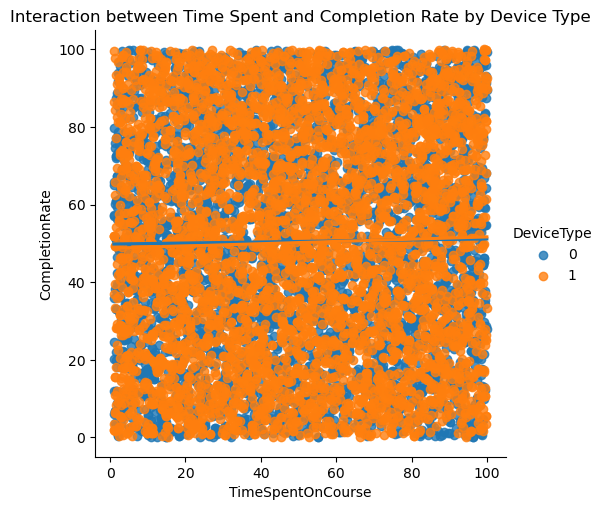

In [72]:
sns.lmplot(x='TimeSpentOnCourse', y='CompletionRate', hue='DeviceType', data=df)
plt.title('Interaction between Time Spent and Completion Rate by Device Type')
plt.show()


In [76]:
print(df.columns)


Index(['UserID', 'CourseCategory', 'TimeSpentOnCourse',
       'NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'QuizScores',
       'CompletionRate', 'DeviceType', 'CourseCompletion',
       'TimeSpentInMinutes', 'Cluster'],
      dtype='object')


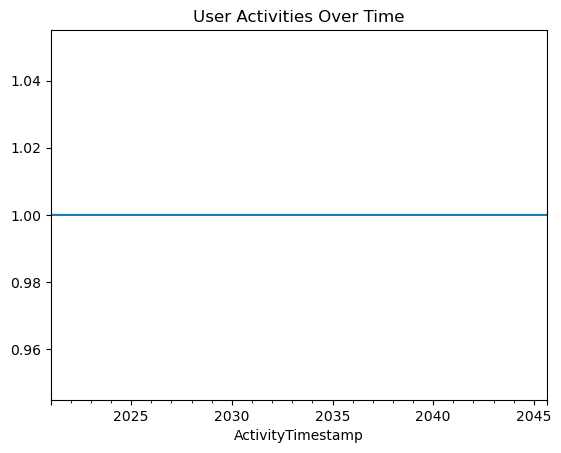

In [81]:
import numpy as np


np.random.seed(0)
df['ActivityTimestamp'] = pd.date_range(start='2021-01-01', periods=len(df), freq='D')
df = df.sort_values(by='ActivityTimestamp')


df.set_index('ActivityTimestamp').resample('D').size().plot()
plt.title('User Activities Over Time')
plt.show()


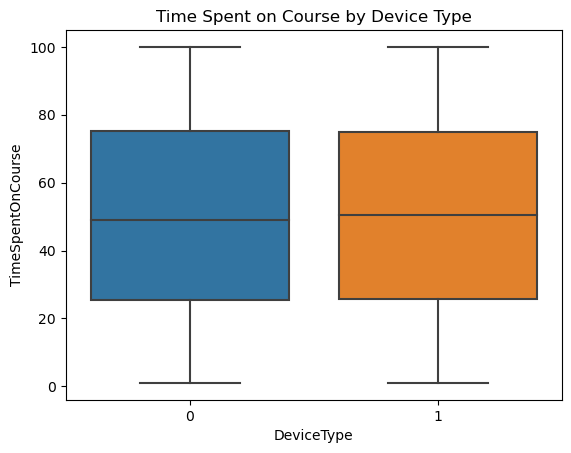

In [82]:
sns.boxplot(data=df, x='DeviceType', y='TimeSpentOnCourse')
plt.title('Time Spent on Course by Device Type')
plt.show()
